<a href="https://colab.research.google.com/github/ligueproleo/I2A2_IA-para-Industria-2023/blob/main/Grupo4_KNN_e_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo 4 - Notebook Algoritmos KNN e K-means

Esse notebook é parte da tarefa do curso IA na Indústria pelo I2AI, turma de 2023, grupo 4, apresentado em 11 de abril de 2023.

Exploramos um dataset com o algoritmo K-means para produzir um agrupamento em 3 classes distintas, para que na sequencia esses dados sejam explorados pelo algoritmo KNN. Contém muitas explicações sobre cada passo como é bem apropriado para um exercício de curso. 


A tarefa está subdividida em etapas:

*   Importar as bibliotecas
*   Importar e visualizar o dataset
*   Preparar o dataset para o K-Means
*   Executar o K-means e avaliar os resultados
*   Preparar o conjunto de dados para o KNN
*   Executar o KNN e avaliar os resultados

# Passo 1: Importar as bibliotecas necessárias

O pandas será usado para importar e manipular os dados, numpy para realizar operações numéricas, matplotlib para plotar os gráficos, scikit-learn para executar os algoritmos de aprendizado de máquina e métricas de avaliação.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, accuracy_score, precision_score

# Passo 2: Importar o dataset e visualizá-lo

Importaremos o dataset Iris, que é um conjunto de dados muito utilizado em problemas de classificação. Ele contém 150 amostras de flores Iris, cada uma com 4 atributos (comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala) e uma classe (Iris Setosa, Iris Versicolour ou Iris Virginica).

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

Visualizar a Organização dos Dados

In [ ]:
# Visualizando a organização do dataset
print(dataset.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Passo 3: Preparar o conjunto de dados para o algoritmo K-means

O algoritmo K-means é um algoritmo de clustering que agrupa os dados em K clusters distintos. Para aplicar o K-means aos dados, primeiro precisamos selecionar os atributos relevantes e normalizar os valores.

Nesse código, selecionamos todas as colunas do dataset, exceto a última (que contém a classe), e aplicamos o StandardScaler para normalizar os valores dos atributos.

In [ ]:
X = dataset.iloc[:, :-1].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Passo 4: Executar o algoritmo K-means e avaliar os resultados

Agora, podemos aplicar o algoritmo K-means aos dados normalizados.
Nesse código, definimos o número de clusters como 3 (pois "sabemos" que há 3 classes no conjunto de dados Iris), usamos o método "k-means++" para escolher os centróides iniciais, definimos o número máximo de iterações como 300 e o número de vezes que o algoritmo será executado com diferentes centróides iniciais como 10.

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

Podemos avaliar a qualidade dos clusters usando o coeficiente de silhueta:

In [ ]:
silhouette_avg = silhouette_score(X, y_kmeans)
print("Coeficiente de silhueta médio para k=3:", silhouette_avg)

Coeficiente de silhueta médio para k=3: 0.4589717867018717


O coeficiente de silhueta varia de -1 a 1, sendo que valores mais próximos de 1 indicam uma separação mais clara entre os clusters. No nosso caso, o coeficiente é razoável.

Para visualizar os clusters, podemos plotar um gráfico de dispersão dos dados, colorindo cada ponto de acordo com o cluster atribuído pelo K-means:

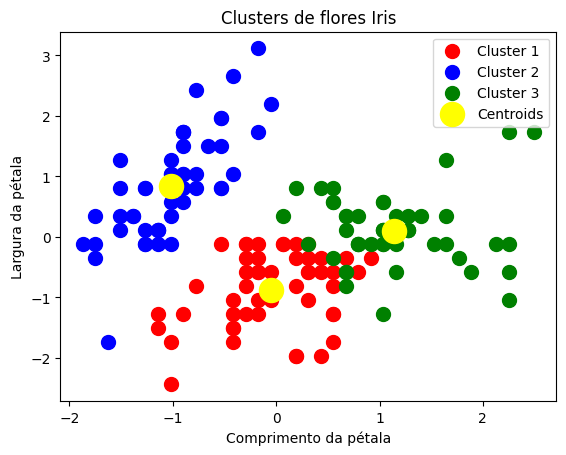

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de flores Iris')
plt.xlabel('Comprimento da pétala')
plt.ylabel('Largura da pétala')
plt.legend()
plt.show()

Esse é o gráfico de dispersão dos dados, onde cada ponto representa uma flor Iris, e a cor indica o cluster atribuído pelo K-means. Os centróides de cada cluster são representados por pontos amarelos.

# Passo 5: Preparar o conjunto de dados para o algoritmo KNN

Agora que os dados foram agrupados em 3 clusters distintos pelo K-means, vamos usar o algoritmo KNN para fazer algumas predições com base nas amostras de treinamento.

Começamos com o uso do método train_test_split para dividir os dados em 75% de treinamento e 25% de teste.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_kmeans, test_size = 0.25, random_state = 0)

# Passo 6: Executar o algoritmo KNN e avaliar os resultados

Com os conjuntos de treinamento e teste preparados, agora podemos aplicar o algoritmo KNN aos dados de treinamento e fazer algumas predições com os dados de teste.

Começamos por definir o número de vizinhos mais próximos (n_neighbors) como 5, e usamos o método fit para treinar o modelo com os dados de treinamento. Em seguida, usamos o método predict para fazer predições com os dados de teste.



In [ ]:
knn = KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Podemos então avaliar a métrica de acurácia do modelo com o conjunto de teste.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo KNN:", accuracy)

Acurácia do modelo KNN: 0.9473684210526315


A acurácia indica a proporção de amostras classificadas corretamente pelo modelo.

Também podemos avaliar a precisão do modelo para cada classe:

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
print("Precisão do modelo KNN para cada classe:", precision)

Precisão do modelo KNN para cada classe: [0.89473684 1.         1.        ]


A precisão indica a proporção de amostras classificadas corretamente como sendo daquela classe, em relação a todas as amostras classificadas como sendo daquela classe.

Por fim, podemos plotar um gráfico de dispersão dos dados de teste, colorindo cada ponto de acordo com a classe atribuída pelo KNN. Nesse gráfico de dispersão dos dados de teste, cada ponto representa uma amostra do conjunto de teste, e a cor indica a classe atribuída pelo KNN.

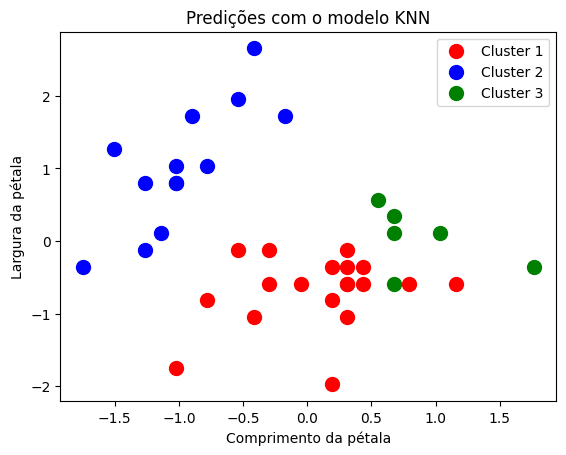

In [ ]:
plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test[y_pred == 2, 0], X_test[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Predições com o modelo KNN')
plt.xlabel('Comprimento da pétala')
plt.ylabel('Largura da pétala')
plt.legend()
plt.show()


Conclusão: K-means e KNN são algoritmos de fácil aplicação e que podem inclusive trabalhar em conjunto. 

##               Valeu pessoal